## Create (multiple) Axes

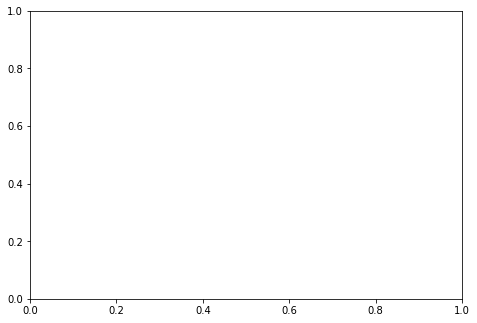

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # 0,0 is starting point of x, y and 1, 1 is the width and height

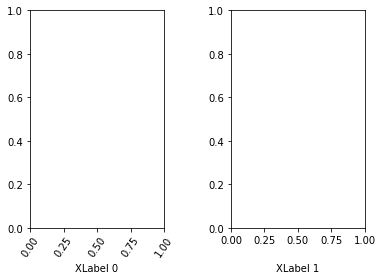

In [2]:
fig, axs = plt.subplots(1, 2) # (row numbers, column numbers)
fig.subplots_adjust(wspace=0.5)
for tick in axs[0].get_xticklabels():
    tick.set_rotation(55)
axs[0].set_xlabel('XLabel 0')
axs[1].set_xlabel('XLabel 1')

fig.align_xlabels()

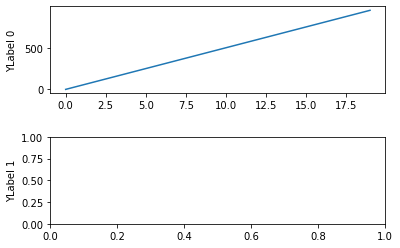

In [3]:
import numpy as np
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)
axs[0].plot(np.arange(0, 1000, 50))
axs[0].set_ylabel('YLabel 0')
axs[1].set_ylabel('YLabel 1')

fig.align_ylabels()

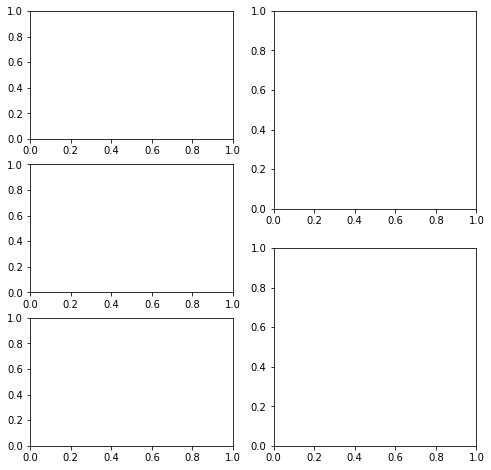

In [4]:
# https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
plt.subplot(3,2,3)
plt.subplot(3,2,5)
plt.subplot(2,2,2)
plt.subplot(2,2,4)

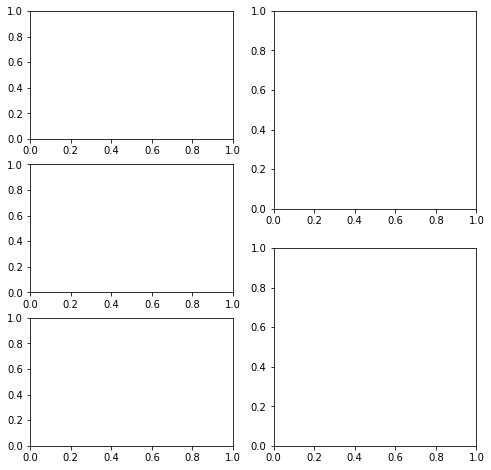

In [5]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.add_subplot(3,2,1)
fig.add_subplot(3,2,3)
fig.add_subplot(3,2,5)
fig.add_subplot(2,2,2)
fig.add_subplot(2,2,4)

## Transformation framework based on data coordinate, axes coordinate, figure coordinate and display coordinate systems

|Coordintate | Transformation object | Description|
|:---:| :---: | :---:|
|"data" | ax.transData | The coordinate system for the data, controlled by xlim and ylim.|
|"axes"| ax.transAxes | The coordinate system of the Axes; (0, 0) is bottom left of the axes, and (1, 1) is top right of the axes.|
|"figure"| fig.transFigure | The coordinate system of the Figure; (0, 0) is bottom left of the figure, and (1, 1) is top right of the figure.|
|"figure-inches"| fig.dpi_scale_trans | The coordinate system of the Figure in inches; (0, 0) is bottom left of the figure, and (width, height) is the top right of the figure in inches.|
|"display"| None, or IdentityTransform() | The pixel coordinate system of the display window; (0, 0) is bottom left of the window, and (width, height) is top right of the display window in pixels.|
|"xaxis", "yaxis"| ax.get_xaxis_transform(), ax.get_yaxis_transform() | Blended coordinate systems; use data coordinates on one of the axis and axes coordinates on the other.|

[source](https://matplotlib.org/3.5.0/tutorials/advanced/transforms_tutorial.html)

### Use "transform=ax.transAxes"

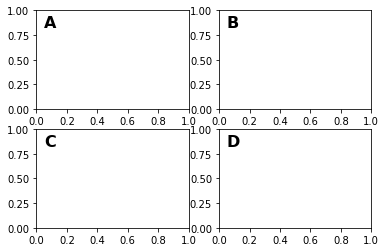

In [6]:
fig=plt.figure()

for i, label in enumerate (('A', 'B', 'C', 'D')):
    ax=fig.add_subplot(2, 2, i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
plt.show()

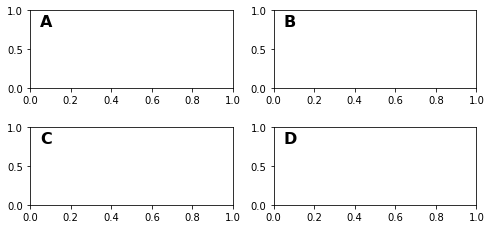

In [7]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,4))
fig.subplots_adjust(top=0.8, wspace=0.2, hspace=0.5) # w:width, h:height

for i, label in enumerate (('A', 'B', 'C', 'D')):
    ax=fig.add_subplot(2, 2, i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
plt.show()

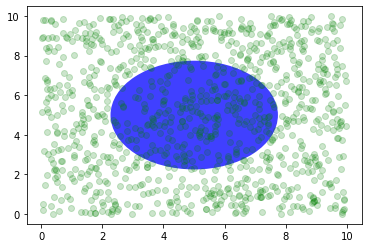

In [8]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go', alpha=0.2)  # plot some data in data coordinates

circ = mpatches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

### Use "transform=ax.transData"
There is no difference of location of the labels because the "Data coordinate system" is the same as the "Axes coordinate system"

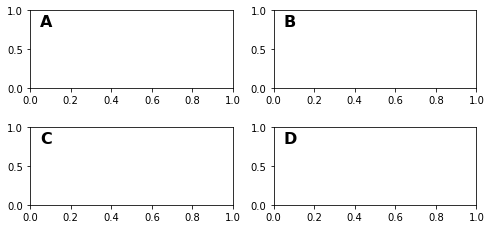

In [9]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,4))
fig.subplots_adjust(top=0.8, wspace=0.2, hspace=0.5) # w:width, h:height

for i, label in enumerate (('A', 'B', 'C', 'D')):
    ax=fig.add_subplot(2, 2, i+1)
    ax.text(0.05, 0.95, label, transform=ax.transData, fontsize=16, fontweight='bold', va='top')
plt.show()

## Accesss the first subplot(221) and change its ylim to (0, 5). Now the yaxis' data is changed.  And apply "transform=ax.transData"

C:\Users\Chul\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


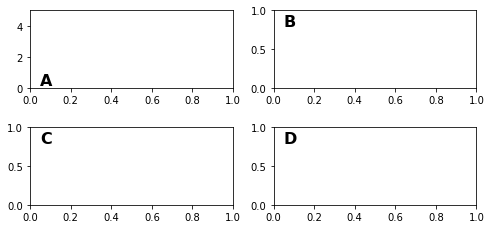

In [10]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,4))
fig.subplots_adjust(top=0.8, wspace=0.2, hspace=0.5) # w:width, h:height

for i, label in enumerate (('A', 'B', 'C', 'D')):
    ax=fig.add_subplot(2, 2, i+1)
    ax.text(0.05, 0.95, label, transform=ax.transData, fontsize=16, fontweight='bold', va='top')
# plt.show()

ax1=fig.add_subplot(2,2,1)
ax1.set_ylim(0, 5)
ax1.text(0.05, 0.95, label, transform=ax.transData, fontsize=16, fontweight='bold', va='top')

plt.show()

## Use "transform=fig.transFigure"

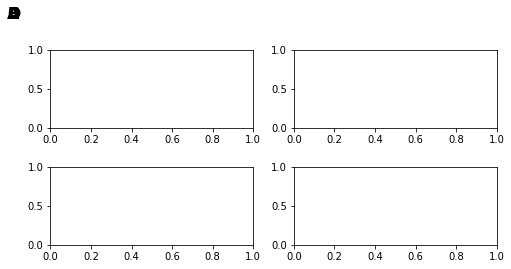

In [11]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,4))
fig.subplots_adjust(top=0.8, wspace=0.2, hspace=0.5) # w:width, h:height

for i, label in enumerate (('A', 'B', 'C', 'D')):
    ax=fig.add_subplot(2, 2, i+1)
    ax.text(0.05, 0.95, label, transform=fig.transFigure, fontsize=16, fontweight='bold', va='top')
plt.show()

## Blended transformations

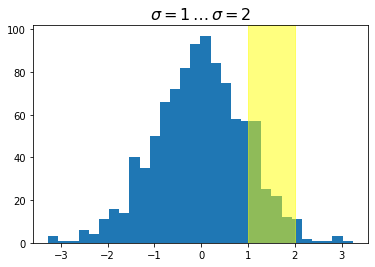

In [12]:
# https://matplotlib.org/3.5.0/tutorials/advanced/transforms_tutorial.html
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
x = np.random.randn(1000)

ax.hist(x, 30)
ax.set_title(r'$\sigma=1 \/ \dots \/ \sigma=2$', fontsize=16)

# the x coords of this transformation are data, and the y coord are axes
trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)
# highlight the 1..2 stddev region with a span.
# We want x to be in data coordinates and y to span from 0..1 in axes coords.
rect = mpatches.Rectangle((1, 0), width=1, height=1, transform=trans,
                          color='yellow', alpha=0.5)
ax.add_patch(rect)

plt.show()

## Plotting in physical coordinates

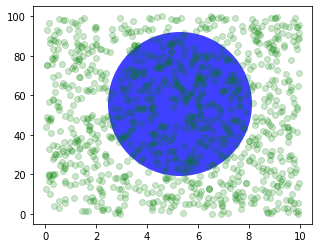

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y*10., 'go', alpha=0.2)  # plot some data in data coordinates
# add a circle in fixed-coordinates
circ = mpatches.Circle((2.5, 2), 1.0, transform=fig.dpi_scale_trans,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()


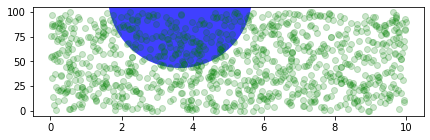

In [14]:
fig, ax = plt.subplots(figsize=(7, 2))
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y*10., 'go', alpha=0.2)  # plot some data in data coordinates
# add a circle in fixed-coordinates
circ = mpatches.Circle((2.5, 2), 1.0, transform=fig.dpi_scale_trans,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

## Use plt.subplots() to create multiple subplots. This method is more flexible in accessing and manipulating each of the subplots

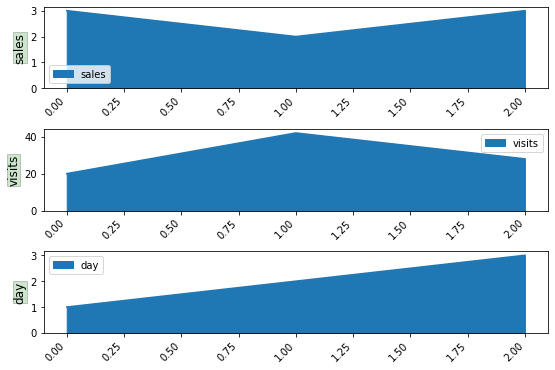

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.DataFrame({'sales':[3,2,3], 
                'visits': [20, 42, 28],
                'day':[1,2,3]})

fig, ax=plt.subplots(3, 1, figsize=(10, 6),sharex=False)
fig.subplots_adjust(left=0.2, hspace=0.5)
box=dict(facecolor='green', pad=0.1, alpha=0.2)

y_var=['sales', 'visits', 'day']
plt.rcParams['figure.dpi']=80

for i in range(len(ax)):
    ax[i]=df.plot(y=y_var[i], kind='area', ax=ax[i])
    ax[i].set_ylabel(y_var[i], fontsize=12, bbox=box)
    plt.setp(ax[i].get_xticklabels(), ha='right', rotation=45)

   sales  visits  day
0      3      20    1
1      2      42    2
2      3      28    3


Text(0.56, 0.91, 'line plot')

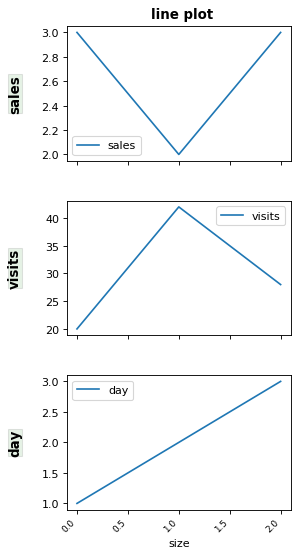

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.DataFrame({'sales':[3,2,3], 
                'visits': [20, 42, 28],
                'day':[1,2,3]})
print(df)
fig, ax=plt.subplots(3, 1, figsize=(4, 8), sharex=True)
fig.subplots_adjust(left=0.2, hspace=0.3)
box=dict(facecolor='green', pad=0.1, alpha=0.1)

plt.rcParams['figure.dpi']=120

for i in range(len(ax)):
    ax[i]=df.plot(y=df.columns[i], kind='line', ax=ax[i])
    ax[i].set_ylabel(df.columns[i], fontsize=12, fontweight='bold', bbox=box)
    ax[i].set_xlabel('size', fontsize=10)
    
    x_label=[f'{i:.1f}' for i in ax[i].get_xticks()]
    ax[i].set_xticklabels(x_label, fontsize=8)
    plt.setp(ax[i].get_xticklabels(), ha='right', rotation=45)
    
    ax[i].yaxis.set_label_coords(-0.2, 0.5)
    ax[i].legend(loc='best')
plt.suptitle('line plot', fontweight='bold', x=0.56, y=0.91)

## Matplotlib.axis.Axis.set_label_coords() Function Example

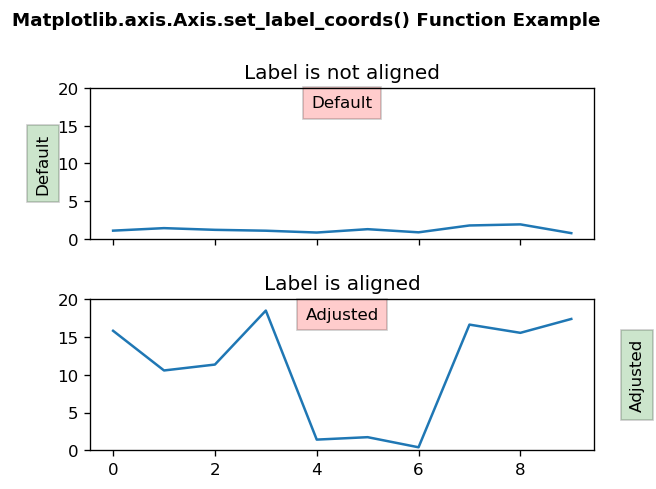

In [17]:
from matplotlib.axis import Axis
import numpy as np
import matplotlib.pyplot as plt


fig, (ax1, ax2)=plt.subplots(2,1, sharex=True)
fig.subplots_adjust(left=0.2, hspace=0.4)
box=dict(facecolor='green', pad=5, alpha=0.2)
box1=dict(facecolor='red', pad=5, alpha=0.2)

np.random.seed(0)
ax1.plot(2*np.random.rand(10))
ax1.set_title('Label is not aligned')
ax1.set_ylabel('Default', bbox=box)
ax1.set_xlabel('Default', bbox=box1)
ax1.set_ylim(0, 20)
ax1.xaxis.set_label_coords(0.5, 0.95)

ax2.plot(20*np.random.rand(10))
ax2.set_title('\nLabel is aligned')
ax2.set_ylabel('Adjusted', bbox=box)
ax2.set_xlabel('Adjusted', bbox=box1)
ax2.set_ylim(0, 20)
# Axis.set_label_coords(ax2.yaxis, 1.1, 0.5)
ax2.yaxis.set_label_coords(1.1, 0.5)
ax2.xaxis.set_label_coords(0.5, 0.95)

fig.suptitle("Matplotlib.axis.Axis.set_label_coords() Function Example", fontsize=11, fontweight='bold', y=1.04)

plt.show()



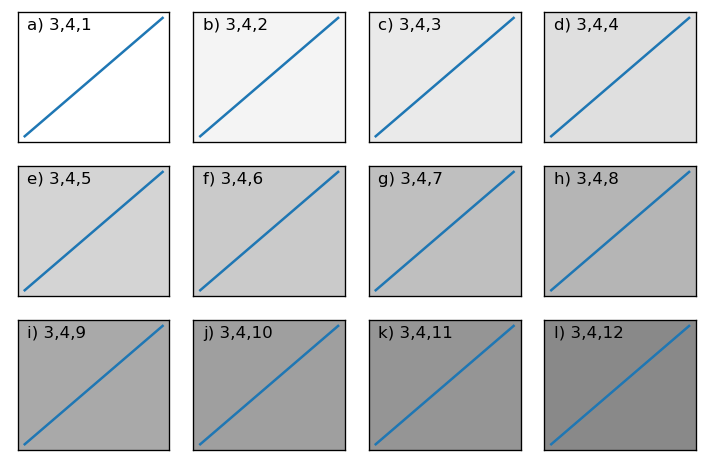

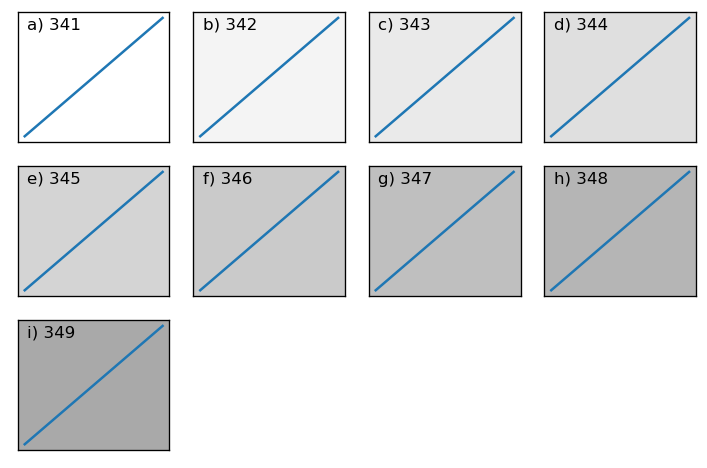

In [18]:
import matplotlib.pyplot as plt

def plot_and_text(axis, text):
    '''Simple function to add a straight line
     and text to an axis object'''
    axis.plot([0,1],[0,1])
    axis.text(0.02, 0.9, text)

f = plt.figure()
f2 = plt.figure()

_max = 12
for i in range(_max):
    axis = f.add_subplot(3,4,i+1, fc=(0,0,0,i/(_max*2)), xticks=[], yticks=[])
    plot_and_text(axis,chr(i+97) + ') ' + '3,4,' +str(i+1))

    # If this check isn't in place, a 
    # ValueError: num must be 1 <= num <= 15, not 0 is raised
    if i < 9:
        axis = f2.add_subplot(341+i, fc=(0,0,0,i/(_max*2)), xticks=[], yticks=[])
        plot_and_text(axis,chr(i+97) + ') ' + str(341+i))

f.tight_layout()
f2.tight_layout()